In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns

In [3]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


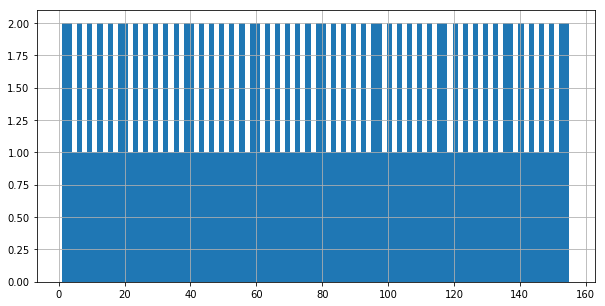

In [29]:
df['Freedom'].hist(bins=100, figsize=[10,5])
plt.show()

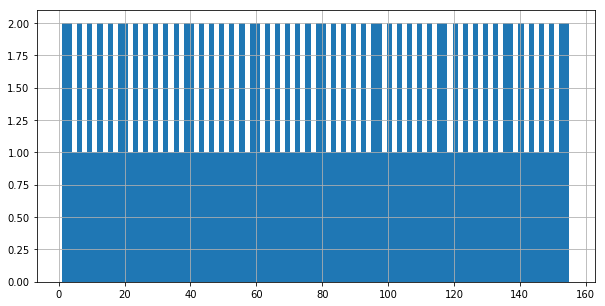

In [30]:
df['Positive affect'].hist(bins=100, figsize=[10,5])
plt.show()

In [34]:
df['Freedom'].median()

78.0

In [32]:
df['Freedom'].mode()

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
5        6.0
6        7.0
7        8.0
8        9.0
9       10.0
10      11.0
11      12.0
12      13.0
13      14.0
14      15.0
15      16.0
16      17.0
17      18.0
18      19.0
19      20.0
20      21.0
21      22.0
22      23.0
23      24.0
24      25.0
25      26.0
26      27.0
27      28.0
28      29.0
29      30.0
       ...  
125    126.0
126    127.0
127    128.0
128    129.0
129    130.0
130    131.0
131    132.0
132    133.0
133    134.0
134    135.0
135    136.0
136    137.0
137    138.0
138    139.0
139    140.0
140    141.0
141    142.0
142    143.0
143    144.0
144    145.0
145    146.0
146    147.0
147    148.0
148    149.0
149    150.0
150    151.0
151    152.0
152    153.0
153    154.0
154    155.0
Length: 155, dtype: float64

In [33]:
df['Freedom'].mean()

78.0

In [35]:
df['Freedom'].std()

44.88875137492688

In [36]:
df['Freedom'].var()

2015.0

In [37]:
df['Freedom'].min()

1.0

In [38]:
df['Freedom'].max()

155.0

In [40]:
freedom_range = df['Freedom'].max() - df['Freedom'].min()
freedom_range

154.0

Ниже коэф.Пирсона положительный, следовательно, две величины прямо коррелируют друг с другом.

In [41]:
df[['Positive affect','Freedom']].corr(method='pearson', min_periods=1)

,Positive affect,Freedom
Positive affect,1.00000,0.68177
Freedom,0.68177,1.00000


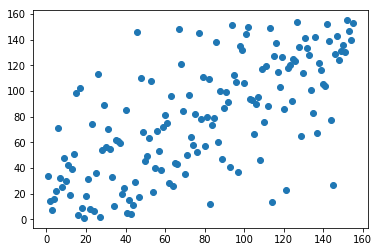

In [45]:
plt.scatter(x=df['Positive affect'], y=df['Freedom'])
plt.show()

In [46]:
df['Freedom'] = (df['Freedom'] - df['Freedom'].mean()) / df['Freedom'].std()

In [47]:
df.corr(method='pearson', min_periods=1)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000000,0.539362,0.491432,0.523643,0.817842,0.546777,0.190071,0.497856,0.813367,0.816740
SD of Ladder,0.539362,1.000000,0.085381,0.619267,0.599464,0.251856,0.258639,0.392154,0.629662,0.611376
Positive affect,0.491432,0.085381,1.000000,0.389697,0.386269,0.681770,0.209659,0.354877,0.304522,0.332839
Negative affect,0.523643,0.619267,0.389697,1.000000,0.621888,0.430241,0.158903,0.338226,0.542143,0.488649
Social support,0.817842,0.599464,0.386269,0.621888,1.000000,0.448903,0.118434,0.442432,0.772912,0.740728
Freedom,0.546777,0.251856,0.681770,0.430241,0.448903,1.000000,0.381304,0.489991,0.409501,0.416263
Corruption,0.190071,0.258639,0.209659,0.158903,0.118434,0.381304,1.000000,0.266138,0.198581,0.123132
Generosity,0.497856,0.392154,0.354877,0.338226,0.442432,0.489991,0.266138,1.000000,0.478739,0.431620
Log of GDP\nper capita,0.813367,0.629662,0.304522,0.542143,0.772912,0.409501,0.198581,0.478739,1.000000,0.847580
Healthy life\nexpectancy,0.816740,0.611376,0.332839,0.488649,0.740728,0.416263,0.123132,0.431620,0.847580,1.000000


In [48]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


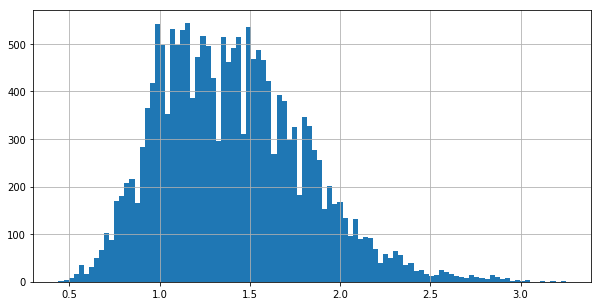

In [49]:
df['AveragePrice'].hist(bins=100, figsize=[10,5])
plt.show()

Ниже коэф.Пирсона отрицательный, следовательно, две величины обратно коррелируют друг с другом.

In [50]:
df[['4046','AveragePrice']].corr(method='pearson', min_periods=1)

,4046,AveragePrice
4046,1.000000,-0.208317
AveragePrice,-0.208317,1.000000
